In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm

In [ ]:
df = pd.read_excel("/content/bitcoin.xlsx")

/usr/local/lib/python3.12/dist-packages/openpyxl/styles/stylesheet.py:237: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


In [ ]:
df.head()

,timeOpen,timeClose,timeHigh,timeLow,priceOpen,priceHigh,priceLow,priceClose,volume
0,1759406400000,1759492799999,1759475760000,1759428180000,118652.385896,121086.407241,118383.158156,120681.259723,7.141516e+10
1,1759320000000,1759406399999,1759406340000,1759321680000,114057.592183,118648.928588,113981.395969,118648.928588,7.132868e+10
2,1759233600000,1759319999999,1759238160000,1759269840000,114396.520241,114836.615425,112740.564747,114056.083647,5.898633e+10
3,1759147200000,1759233599999,1759221900000,1759174020000,112117.878794,114473.569892,111589.950680,114400.386428,6.000015e+10
4,1759060800000,1759147199999,1759144200000,1759107000000,109681.947300,112375.482143,109236.947744,112122.639151,3.337105e+10


In [ ]:
df = df[['timeClose','priceClose', 'volume']]

In [ ]:
df['timeClose']=(pd.to_datetime(df['timeClose'],unit='ms'))
df.head()

,timeClose,priceClose,volume
0,2025-10-03 11:59:59.999,120681.259723,7.141516e+10
1,2025-10-02 11:59:59.999,118648.928588,7.132868e+10
2,2025-10-01 11:59:59.999,114056.083647,5.898633e+10
3,2025-09-30 11:59:59.999,114400.386428,6.000015e+10
4,2025-09-29 11:59:59.999,112122.639151,3.337105e+10


In [ ]:
df.tail()

,timeClose,priceClose,volume
2571,2018-08-27 11:59:59.999,6707.26,3.295500e+09
2572,2018-08-26 11:59:59.999,6763.19,3.312600e+09
2573,2018-08-25 11:59:59.999,6719.96,4.097820e+09
2574,2018-08-24 11:59:59.999,6534.88,3.426180e+09
2575,2018-08-23 11:59:59.999,6376.71,4.668110e+09


In [ ]:
df = df[::-1]
df.head()

,timeClose,priceClose,volume
2575,2018-08-23 11:59:59.999,6376.71,4.668110e+09
2574,2018-08-24 11:59:59.999,6534.88,3.426180e+09
2573,2018-08-25 11:59:59.999,6719.96,4.097820e+09
2572,2018-08-26 11:59:59.999,6763.19,3.312600e+09
2571,2018-08-27 11:59:59.999,6707.26,3.295500e+09


In [ ]:
df = df.reset_index()
df.head()

,index,timeClose,priceClose,volume
0,2575,2018-08-23 11:59:59.999,6376.71,4.668110e+09
1,2574,2018-08-24 11:59:59.999,6534.88,3.426180e+09
2,2573,2018-08-25 11:59:59.999,6719.96,4.097820e+09
3,2572,2018-08-26 11:59:59.999,6763.19,3.312600e+09
4,2571,2018-08-27 11:59:59.999,6707.26,3.295500e+09


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2576 entries, 0 to 2575
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   index       2576 non-null   int64         
 1   timeClose   2576 non-null   datetime64[ns]
 2   priceClose  2576 non-null   float64       
 3   volume      2576 non-null   float64       
dtypes: datetime64[ns](1), float64(2), int64(1)
memory usage: 80.6 KB


In [ ]:
df = df.drop('index', axis = 1)

In [ ]:
df.set_index('timeClose', inplace=True)
df.tail()

,priceClose,volume
timeClose,,
2025-09-29 11:59:59.999,112122.639151,3.337105e+10
2025-09-30 11:59:59.999,114400.386428,6.000015e+10
2025-10-01 11:59:59.999,114056.083647,5.898633e+10
2025-10-02 11:59:59.999,118648.928588,7.132868e+10
2025-10-03 11:59:59.999,120681.259723,7.141516e+10


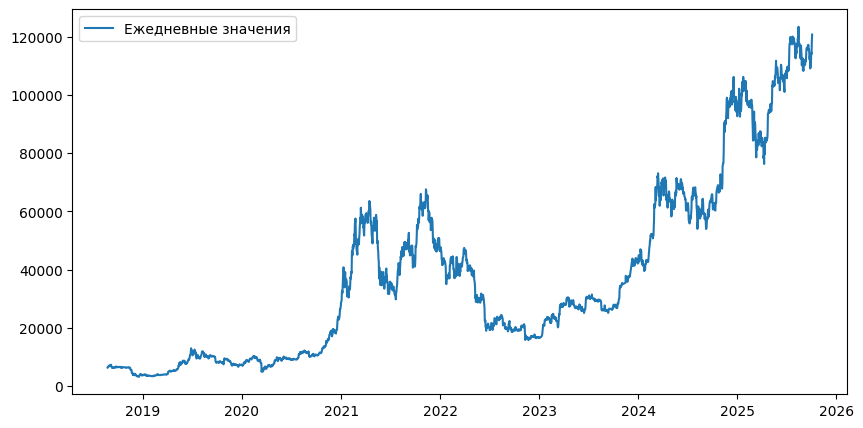

In [ ]:
# Построим графики
plt.figure(figsize=(10, 5))
plt.plot(df.index, df['priceClose'], label='Ежедневные значения')
plt.legend()
plt.show()

есть подозрения на тренд

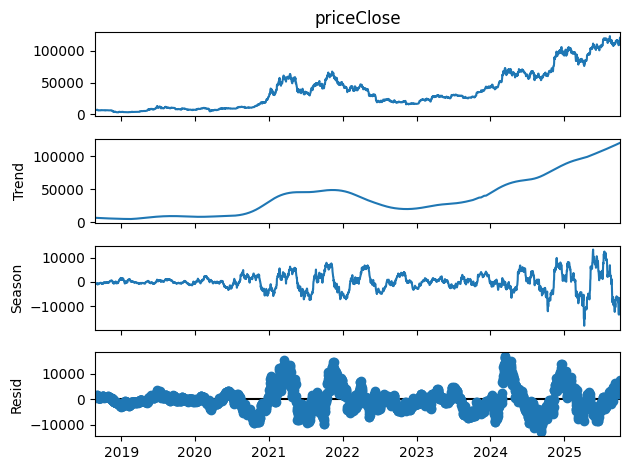

In [ ]:
from statsmodels.tsa.seasonal import STL

stl = STL(df['priceClose'], period=180)  #  если данные по дням и предполагается полугодовая сезонность
res = stl.fit()

res.plot()
plt.show()


In [ ]:
monthly = df.resample('ME').mean()
monthly.head()

,priceClose,volume
timeClose,,
2018-08-31,6789.812222,4.009809e+09
2018-09-30,6624.409000,4.341291e+09
2018-10-31,6495.052581,3.814449e+09
2018-11-30,5480.928215,5.216758e+09
2018-12-31,3726.345355,5.490741e+09


In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import acf, pacf  # добавили pacf

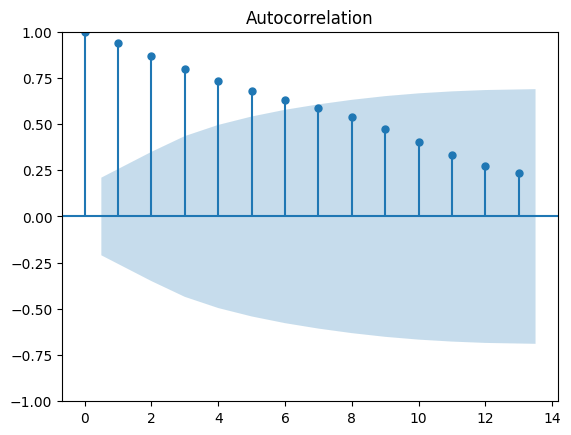

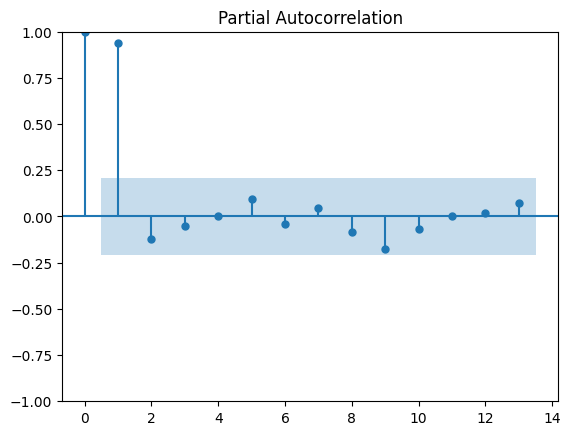

In [ ]:
plot_acf(monthly["priceClose"], lags=13)
plt.show()

plot_pacf(monthly["priceClose"], lags=13)
plt.show()


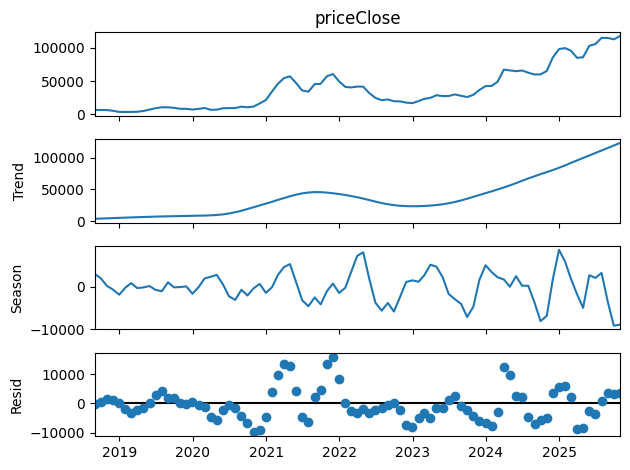

In [ ]:
stl = STL(monthly['priceClose'], period=12)  #  если данные по дням и предполагается годовая сезонность
res = stl.fit()

res.plot()
plt.show()

какая то годовая сезонность присутствует

In [ ]:
monthly["lag_1"] = monthly["priceClose"].shift(1)
monthly = monthly.dropna()
monthly.head()

,priceClose,volume,lag_1
timeClose,,,
2018-09-30,6624.409000,4.341291e+09,6789.812222
2018-10-31,6495.052581,3.814449e+09,6624.409000
2018-11-30,5480.928215,5.216758e+09,6495.052581
2018-12-31,3726.345355,5.490741e+09,5480.928215
2019-01-31,3710.745541,5.360205e+09,3726.345355


In [ ]:
X = sm.add_constant(monthly["lag_1"])
y = monthly["priceClose"]

model = sm.OLS(y, X).fit()


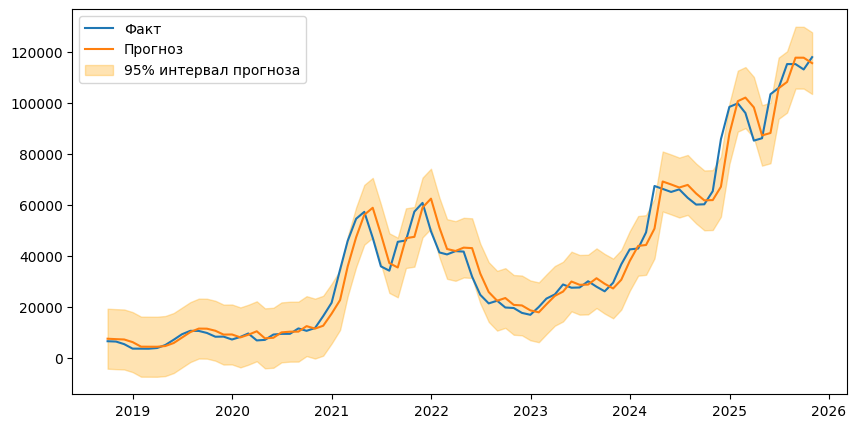

In [ ]:
pred = model.get_prediction(X)
pred_summary = pred.summary_frame(alpha=0.05)  # 95%

plt.figure(figsize=(10,5))
plt.plot(monthly.index, y, label="Факт")
plt.plot(monthly.index, pred_summary["mean"], label="Прогноз")
plt.fill_between(monthly.index,
                 pred_summary["obs_ci_lower"],
                 pred_summary["obs_ci_upper"],
                 color="orange", alpha=0.3, label="95% интервал прогноза")
plt.legend()
plt.show()


попробуем предсказать за последние 6 месяцев, чтоб модель не видела этого в трейне

In [ ]:
X = sm.add_constant(monthly["lag_1"])
y = monthly["priceClose"]


In [ ]:
train, test = monthly.iloc[:-6], monthly.iloc[-6:]

формируем фичи для линрега sklearn

In [ ]:
X_train = train.drop('priceClose', axis = 1)
y_train = train["priceClose"]

In [ ]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train, y_train)


LinearRegression()

In [ ]:
X_test = test.drop('priceClose', axis = 1)
y_test = test["priceClose"]

In [ ]:
preds = lr.predict(X_test)
preds

array([ 87105.87141311, 103345.82828304, 108584.6907802 , 117614.91689077,
       114585.31285615, 115697.94770297])

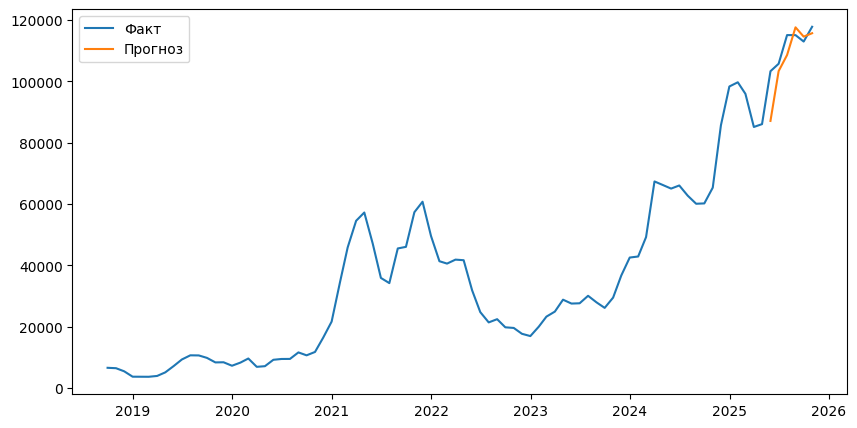

In [ ]:
plt.figure(figsize=(10,5))
plt.plot(monthly.index, y, label="Факт")
plt.plot(X_test.index, preds, label="Прогноз")
plt.legend()
plt.show()


In [ ]:
from sklearn.metrics import mean_absolute_percentage_error

print(f"MAPE = {mean_absolute_percentage_error(preds, y_test)}");

MAPE = 0.053796050163415376


In [ ]:
from sklearn.model_selection import TimeSeriesSplit


y = pd.concat([y_train, y_test], axis=0)

X = pd.concat([X_train, X_test], axis=0)

In [ ]:
from sklearn.model_selection import cross_val_score

In [ ]:
lr_model = LinearRegression()

In [ ]:
scores = cross_val_score(lr_model, X, y, cv=5)
print("Cross-validation scores:", scores)
print("Mean cross-validation score:", scores.mean())

Cross-validation scores: [0.55876726 0.83561385 0.77627523 0.86960278 0.85977188]
Mean cross-validation score: 0.7800061993590018


In [ ]:
tscv = TimeSeriesSplit(n_splits=5)
errors = []
i = 0
for train_index, test_index in tscv.split(X):
    X_train, X_test = X.values[train_index], X.values[test_index]
    y_train, y_test = y.values[train_index], y.values[test_index]
    model = LinearRegression()
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    errors.append(mean_absolute_percentage_error(preds, y_test))
    print(i, len(X_train))
    i+=1

np.mean(errors)

0 16
1 30
2 44
3 58
4 72


np.float64(0.14830923110178013)

In [ ]:
monthly.shape

(86, 3)